# Exploratory Data Analysis and Visualization for metrics with Pandas and Plotly


The following example includes visualizations of a University dataset that compares several universities on metrics that convey how much they value certain variables when evaluating student applications. 

Values are presented on the following ordinate scale: 
0 = Not considered
1 = Considered
2 = Important
3 = Very Important

e.g. If a university has a value of 3 on variable "Essay", it means that the essay in the application process is very important for this university.

Note: This data is obtained from kaggle and may not have accurate information. The data is used in this example only to demonstrate data visualization and data analysis tools that can otherwise be applied to KPIs and applicant test results.

In [17]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image, display


In [3]:
admission_df = pd.read_csv("Admission Data.csv")

In [4]:
admission_df.head(23)

,Name of University,Rigor,Rank,GPA,Test Score,Essay,Recommendation,Interview,Extracurricular,Talent,Personality,First Generation,Religious,State Residency,Race,Volunteer,Work Experience,Level of Interest
0,Princeton University,3,3,3,3,3,3,1,3,3,3,1,0.0,0,1,1,1,0
1,Brown University,3,3,3,3,3,3,1,2,3,3,1,0.0,1,1,1,1,0
2,California Institute of Technology (Caltech),3,2,2,3,3,3,0,2,1,3,1,0.0,0,1,1,1,0
3,Cornell University,3,2,3,3,3,3,1,3,3,3,1,NaN,1,1,1,1,0
4,Dartmouth College,3,3,3,3,3,3,1,3,2,3,0,1.0,0,1,1,1,1
5,Harvard University,1,1,1,1,1,1,1,1,1,1,1,0.0,0,1,1,1,0
6,Massachusetts Institute of Technology (MIT),2,1,2,2,2,2,2,2,2,1,1,0.0,0,1,1,1,0
7,Stanford University,3,3,3,3,3,3,1,3,3,3,1,0.0,0,1,1,1,0
8,University of Pennsylvania,3,2,1,1,1,1,2,2,2,3,1,0.0,1,1,1,1,1
9,Washington University in St. Louis (WashU),3,3,3,3,3,3,1,2,3,3,1,0.0,0,1,2,2,1


In [5]:
admission_df[admission_df["Name of University"] == "Harvard University"]

,Name of University,Rigor,Rank,GPA,Test Score,Essay,Recommendation,Interview,Extracurricular,Talent,Personality,First Generation,Religious,State Residency,Race,Volunteer,Work Experience,Level of Interest
5,Harvard University,1,1,1,1,1,1,1,1,1,1,1,0.0,0,1,1,1,0


In [6]:
#
print(admission_df["Name of University"].unique())
print("_________________________________________________________________________")
print(" Number of universities: " + str(len(admission_df["Name of University"].unique())))

['Princeton University' 'Brown University'
 'California Institute of Technology (Caltech)' 'Cornell University'
 'Dartmouth College' 'Harvard University'
 'Massachusetts Institute of Technology (MIT)' 'Stanford University'
 'University of Pennsylvania' 'Washington University in St. Louis (WashU)'
 'Yale University' 'Rice University' 'Duke University'
 'Vanderbilt University' 'Northwestern University'
 'University of Southern California (USC)' 'University of Notre Dame'
 'Carnegie Mellon University (CMU)' 'Georgetown University'
 'New York University (NYU)' 'The Ohio State University (OSU)'
 'Miami University' 'Case Western Reserve University (CWR)']
_________________________________________________________________________
 Number of universities: 23


In [39]:
metric_list = admission_df.columns[1:]

fig = make_subplots(rows=len(metric_list), cols=1)

for i in range(len(metric_list)):

    fig.append_trace(go.Bar( x = admission_df["Name of University"], y = admission_df[metric_list[i]]),  row=i+1, col=1)
 
fig['layout']['yaxis' ]['title']= metric_list[0]
for i in range(len(metric_list[1:]) - 2):
    fig['layout']['yaxis' + str(i+2)]['title']= metric_list[i]
    
fig['layout'].update(height=9000, width=1000, title='Universities compared on each metric from the dataset')
print("")




Note: These plots are interactive, they are displayed here as static images because they would otherwise not be visible on GitHub.

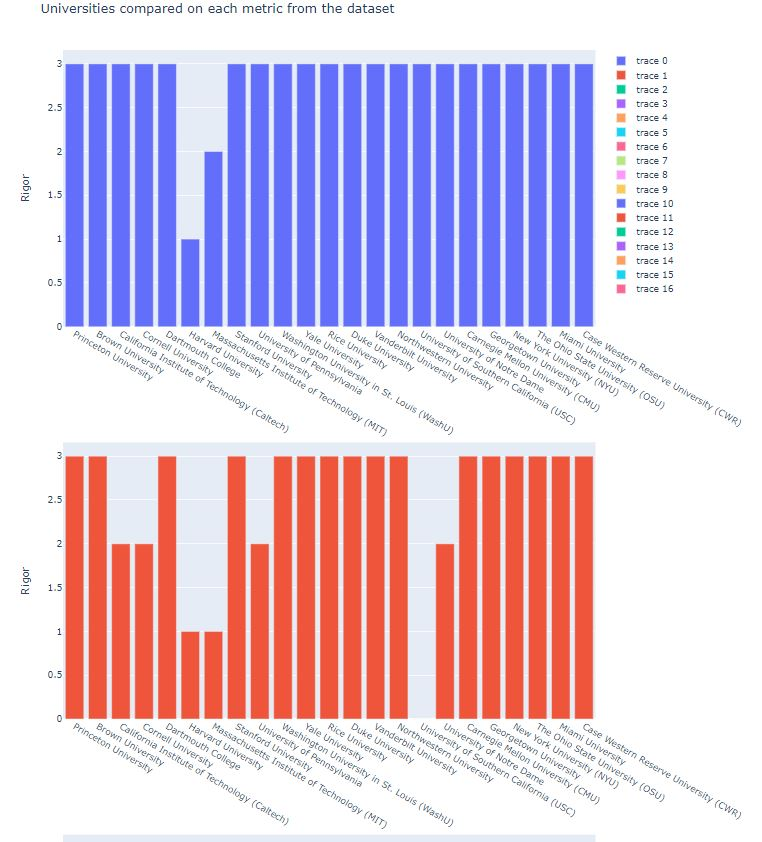

In [23]:
display(Image(filename="EDA_1.jpg"))

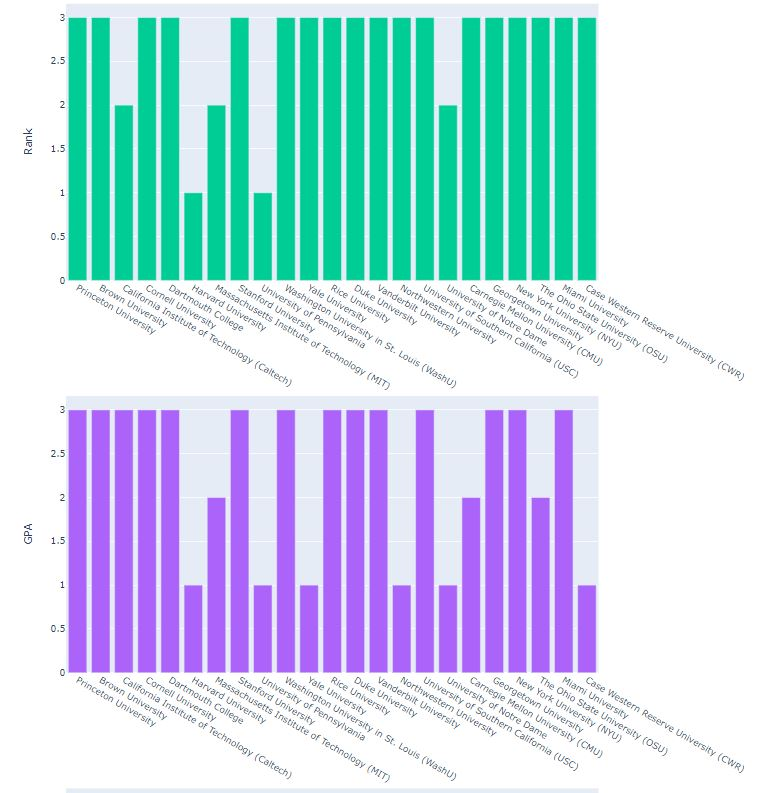

In [26]:
display(Image(filename="EDA_2.jpg"))

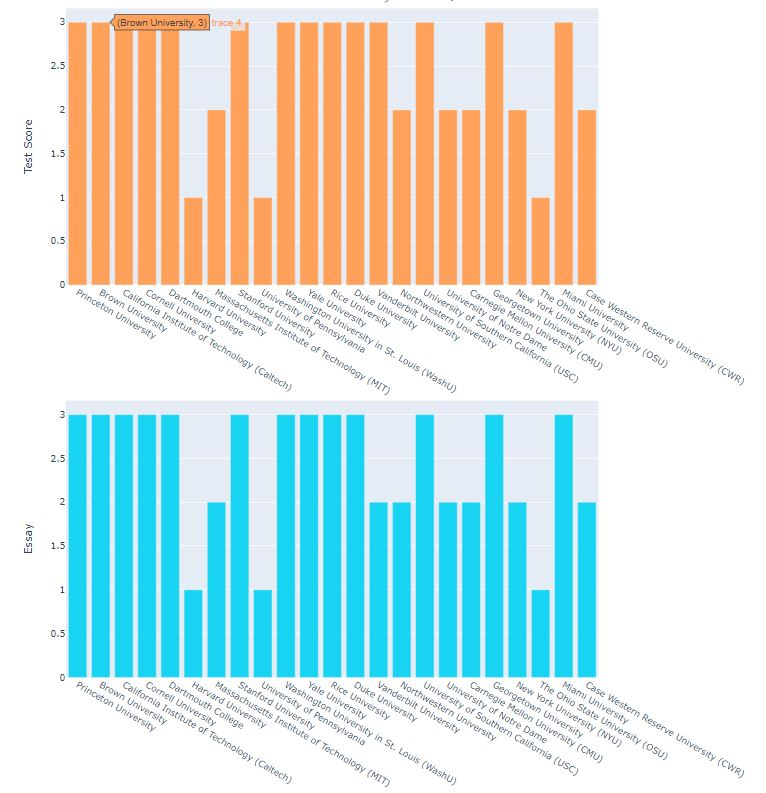

In [28]:
display(Image(filename="EDA_3.jpg"))

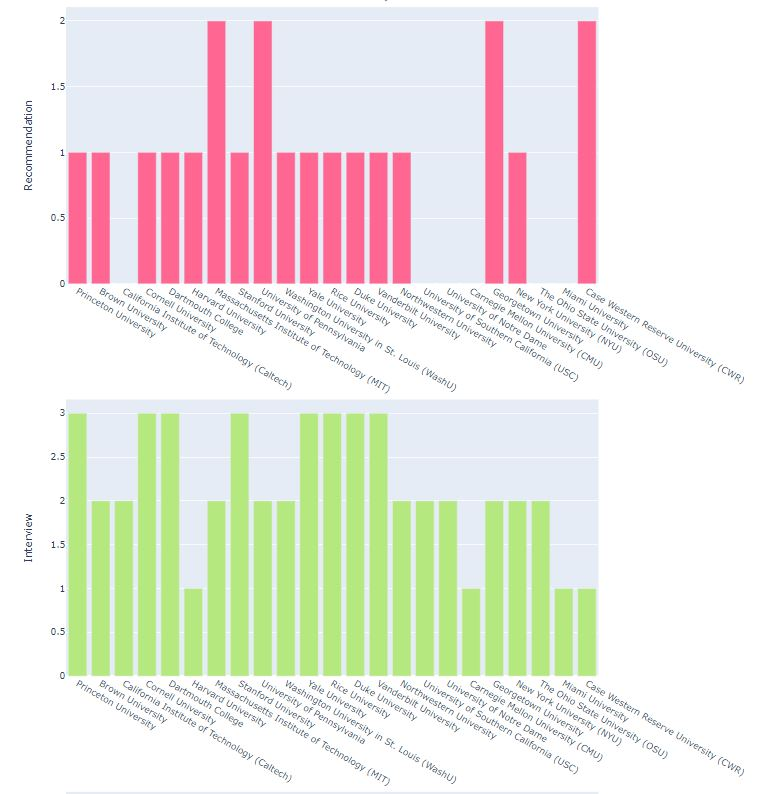

In [29]:
display(Image(filename="EDA_4.jpg"))

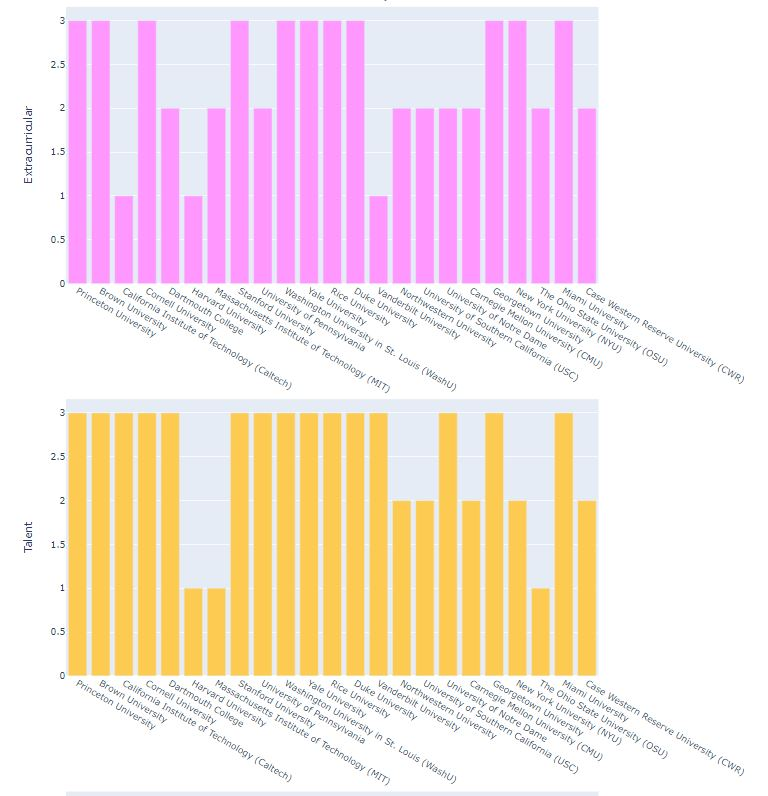

In [30]:
display(Image(filename="EDA_5.jpg"))

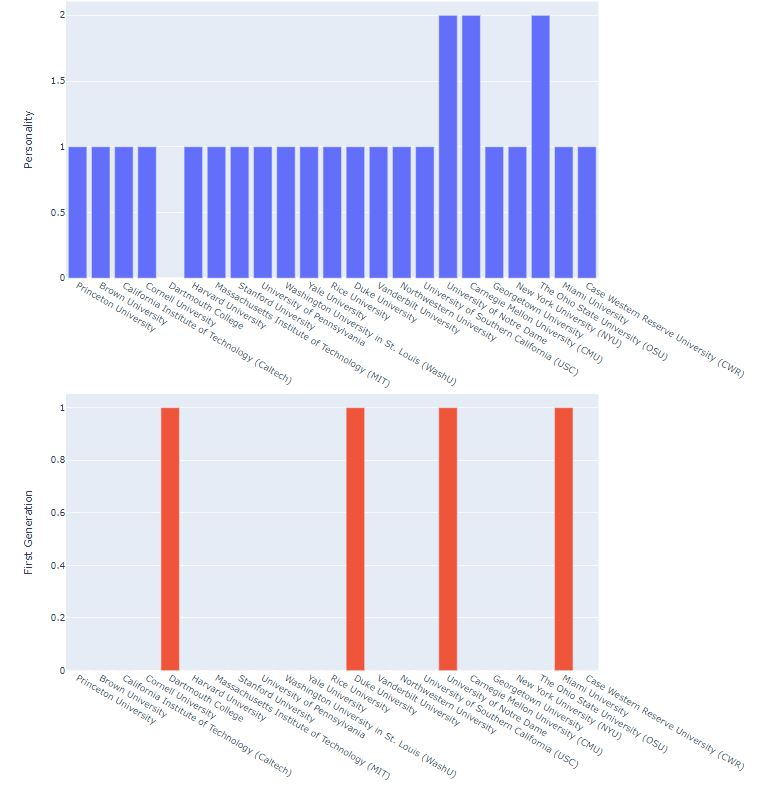

In [31]:
display(Image(filename="EDA_6.jpg"))

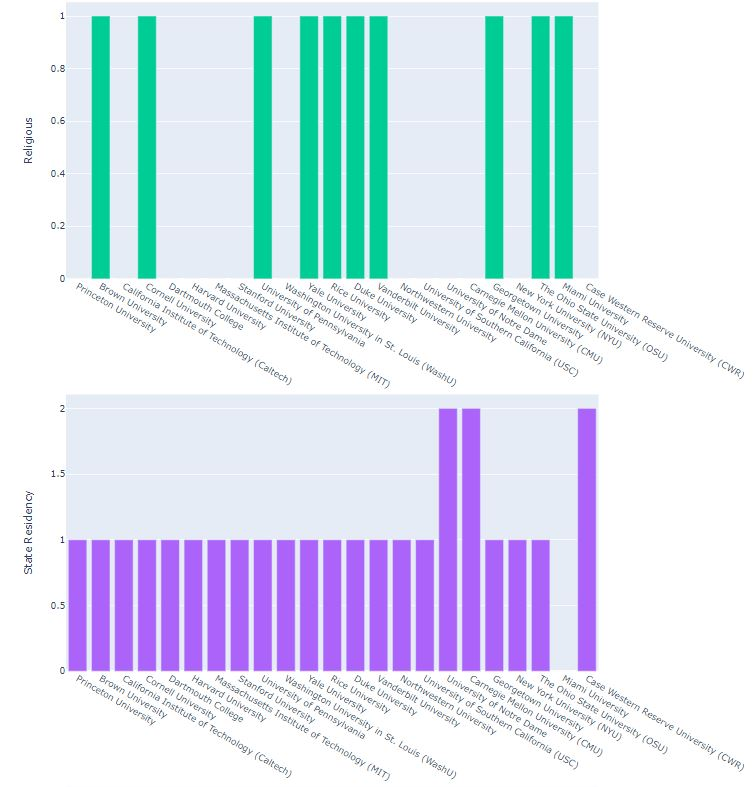

In [32]:
display(Image(filename="EDA_7.jpg"))

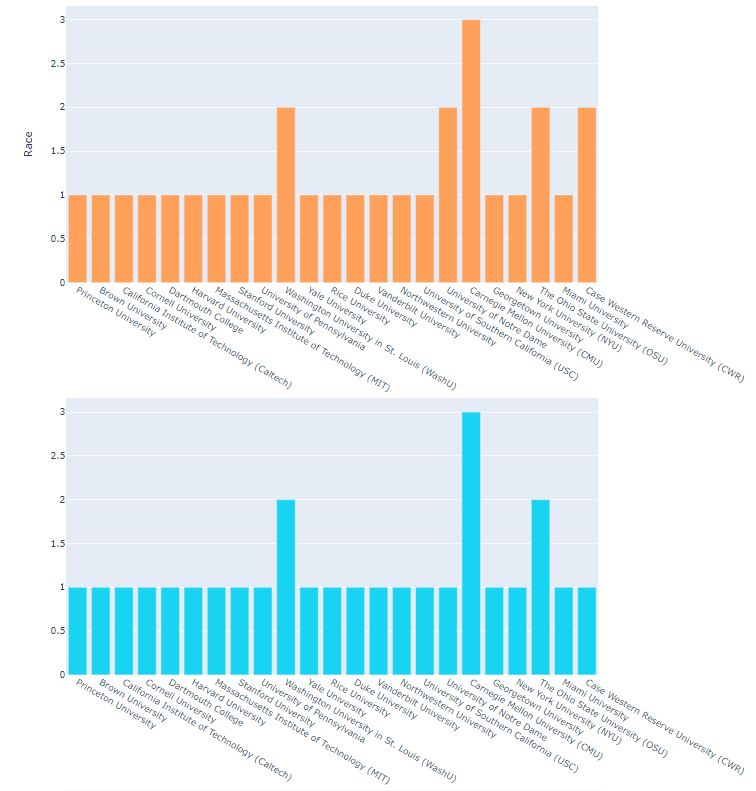

In [33]:
display(Image(filename="EDA_8.jpg"))

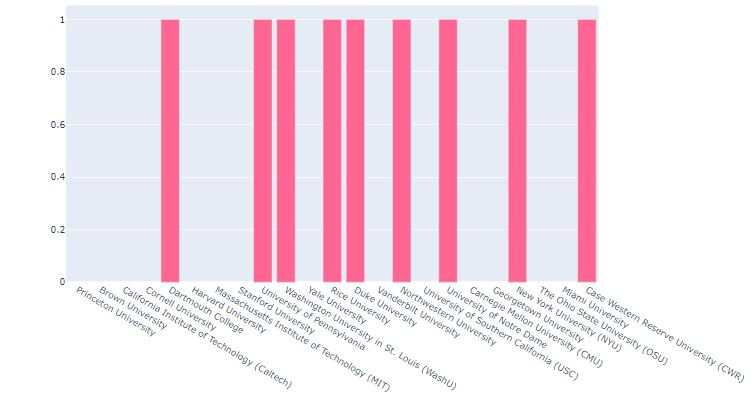

In [34]:
display(Image(filename="EDA_9.jpg"))

In [36]:
fig = px.bar(admission_df, "Name of University", ["Interview"], color=admission_df["GPA"], title="Example 2 :Bar plot with hue that allows to see relations between variables")

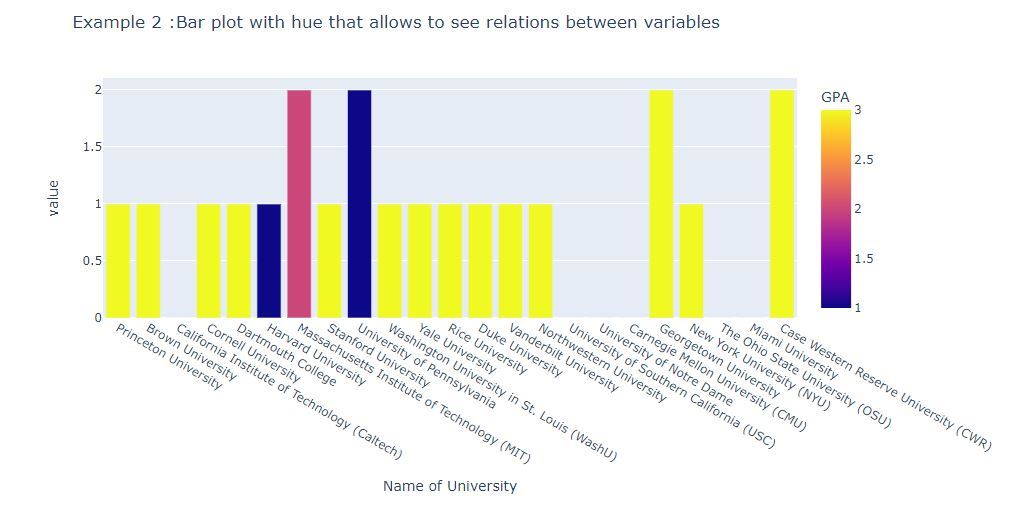

In [35]:
display(Image(filename="EDA_10.jpg"))

In [14]:
correlation_matrix = admission_df.corr()

In [15]:
correlation_matrix.head(23)

,Rigor,Rank,GPA,Test Score,Essay,Recommendation,Interview,Extracurricular,Talent,Personality,First Generation,Religious,State Residency,Race,Volunteer,Work Experience,Level of Interest
Rigor,1.000000,0.536021,0.639234,0.341663,0.466974,0.450914,-0.187366,0.349372,0.423287,0.620661,0.062124,0.140720,0.255562,0.062124,0.143711,0.105523,0.233628
Rank,0.536021,1.000000,0.563018,0.171677,0.239897,0.205475,0.083908,0.218391,0.438471,0.422219,-0.005603,0.115045,0.295022,-0.005603,0.185773,0.209372,0.248163
GPA,0.639234,0.563018,1.000000,0.520714,0.622094,0.594473,-0.172319,0.321314,0.544860,0.259916,-0.067172,0.050899,0.147375,-0.067172,0.109347,0.177486,-0.037424
Test Score,0.341663,0.171677,0.520714,1.000000,0.715626,0.672247,-0.177163,0.402027,0.375426,0.409803,-0.332126,0.098161,0.154258,-0.455334,-0.293278,-0.040946,-0.219363
Essay,0.466974,0.239897,0.622094,0.715626,1.000000,0.959114,-0.097157,0.528396,0.450874,0.703704,-0.441149,0.193022,0.149453,-0.291937,-0.330165,-0.242433,-0.162650
Recommendation,0.450914,0.205475,0.594473,0.672247,0.959114,1.000000,-0.105646,0.458386,0.570445,0.665432,-0.429769,0.224055,0.080362,-0.280001,-0.301268,-0.221214,-0.114279
Interview,-0.187366,0.083908,-0.172319,-0.177163,-0.097157,-0.105646,1.000000,0.127885,0.161510,0.004048,-0.460912,-0.288675,0.116682,0.028364,-0.311666,-0.367363,0.242965
Extracurricular,0.349372,0.218391,0.321314,0.402027,0.528396,0.458386,0.127885,1.000000,0.320466,0.513299,-0.356998,0.077207,0.282843,-0.204943,-0.474095,-0.348117,0.055249
Talent,0.423287,0.438471,0.544860,0.375426,0.450874,0.570445,0.161510,0.320466,1.000000,0.420563,-0.106186,0.122484,0.316699,-0.258829,-0.127938,-0.050729,0.110926
Personality,0.620661,0.422219,0.259916,0.409803,0.703704,0.665432,0.004048,0.513299,0.420563,1.000000,-0.304912,0.326006,0.341607,-0.155700,-0.245123,-0.264472,0.162650


In [37]:
fig=px.imshow(correlation_matrix, title = "Example 3: Correlation matrix displayed as heatmap for quicker detection of correlations between variables")

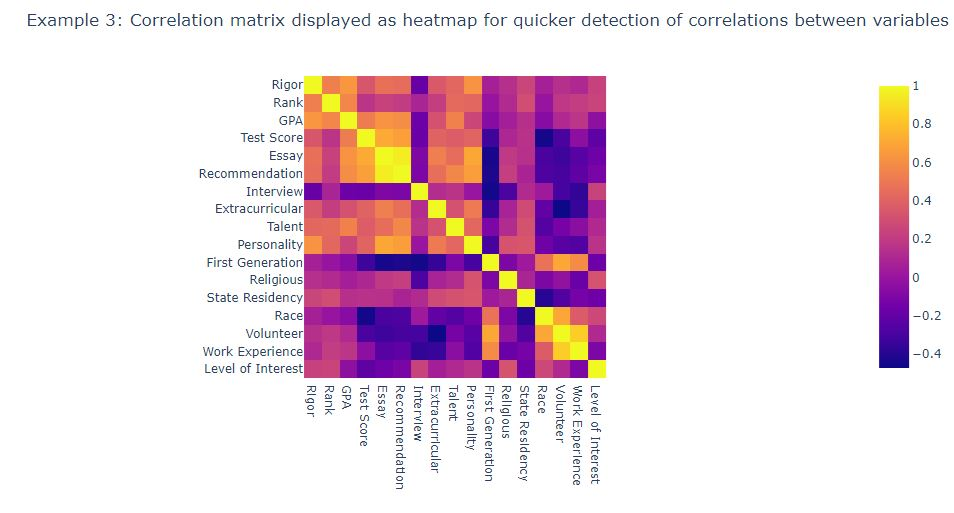

In [38]:
display(Image(filename="EDA_11.jpg"))